<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook covers:


1. Voting (Soft & Hard)
2. Bagging & Pasting 
3. Random Forest ( Extraa Trees + Feature Importance) 
4. Boosting ( AdaBoost +GB + XGBoost)



For example, you can train a group of Decision Tree classifiers, each on a different
random subset of the training set. To make predictions, you just obtain the predictions
of all individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a Random Forest,
and despite its simplicity, this is one of the most powerful Machine Learning algorithms
available today.


Moreover,, you will often use Ensemble methods near
the end of a project, once you have already built a few good predictors, to combine
them into an even better predictor. In fact, the winning solutions in Machine Learning
competitions often involve several Ensemble methods (most famously in the Netflix
Prize competition).

# **Hard Voting-Ensemble Learning**

The following code creates and trains a voting classifier in Scikit-Learn, composed of
three diverse classifiers

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rf_clf = RandomForestClassifier(random_state=42,n_estimators=10)
log_clf =LogisticRegression(random_state=42,solver="liblinear")
svc_clf=SVC (random_state=42,gamma="auto")

voting_clf = VotingClassifier(estimators=[('rf',rf_clf),('lr',log_clf),('svc',svc_clf)] , voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('svc', SVC(gamma='auto', random_state=42))])

Let’s look at each classifier’s accuracy on the test set:

In [ ]:
from sklearn.metrics import accuracy_score

for _clf in (rf_clf , log_clf , svc_clf, voting_clf):
  _clf.fit(X_train , y_train)
  y_pred=_clf.predict(X_test)
  print(_clf.__class__.__name__ , accuracy_score(y_test, y_pred))


RandomForestClassifier 0.872
LogisticRegression 0.864
SVC 0.888
VotingClassifier 0.896


There you have it! The voting classifier slightly outperforms all the individual classifiers.

# **Soft Voting-Ensemble Learning**

If all classifiers are able to estimate class probabilities (i.e., they have a
pre
method), then you can tell Scikit-Learn to predict the class with the
dict_proba()
highest class probability, averaged over all the individual classifiers. This is called sof
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes.


All you need to do is:
1. replace
with
voting="hard"
2. 
and ensure that all classifiers can estimate class probabilities.
voting="soft"

This is
not the case of the
class by default, so you need to set its
hyperpara
**SVC**
probability
meter
to
(this will make the
class use cross-validation to estimate class prob
True
SVC
abilities,
slowing down training, and it will add a
method). If you
predict_proba()

In [ ]:

rf_clf = RandomForestClassifier(random_state=42,n_estimators=10)
log_clf=LogisticRegression(random_state=42,solver='liblinear')
svc_clf = SVC(random_state=42, gamma='auto',probability=True)
voting_clf = VotingClassifier(estimators= [('rf',rf_clf),('log',log_clf),('svc',log_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('log',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('svc',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
for _clf in (rf_clf , log_clf, svc_clf , voting_clf):
  _clf.fit(X_train, y_train)
  y_pred=_clf.predict(X_test)
  print (_clf.__class__.__name__ , accuracy_score(y_test,y_pred))

RandomForestClassifier 0.872
LogisticRegression 0.864
SVC 0.888
VotingClassifier 0.872


**soft-voting** in most cases is better than **hard-voting**

# **Bagging and Pasting**

Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
sifier class (or BaggingRegressor for regression). The following code trains an
ensemble of 500 Decision Tree classifiers,5 each trained on 100 training instances randomly
sampled from the training set with replacement (this is an example of bagging,
but if you want to use pasting instead, just set bootstrap=False). The n_jobs parameter
tells Scikit-Learn the number of CPU cores to use for training and predictions
(–1 tells Scikit-Learn to use all available cores)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_tree = dt_clf.predict(X_test)
print('DecisionTreeClassifier',accuracy_score(y_test, y_pred_tree))


bag_clf = BaggingClassifier(dt_clf , n_estimators=500 , max_samples= 100 , n_jobs=-1 ,bootstrap=True , random_state=42)
bag_clf.fit(X_train , y_train)
y_pred = bag_clf.predict(X_test)
print('BaggingClassifier',accuracy_score(y_test, y_pred))




DecisionTreeClassifier 0.856
BaggingClassifier 0.904


using One single decision tree

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


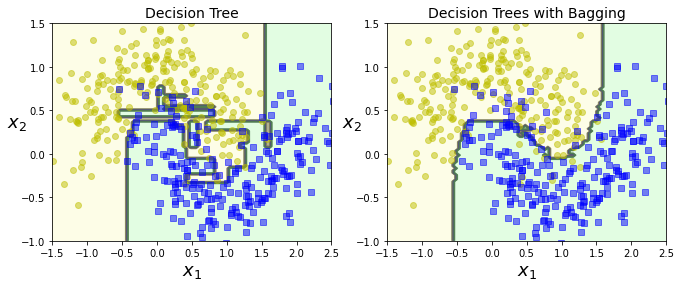

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

compares the decision boundary of a single Decision Tree with the decision
boundary of a bagging ensemble of 500 trees (from the preceding code), both
trained on the moons dataset. As you can see, the ensemble’s predictions will likely
generalize much better than the single Decision Tree’s predictions: the ensemble has a
comparable bias but a smaller variance (it makes roughly the same number of errors
on the training set, but the decision boundary is less irregular).

**Out Of Bag Evaluations**

With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.


Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.
In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training. The following code demonstrates
this.

In [ ]:
bag_clf = BaggingClassifier(dt_clf , n_estimators=500 , max_samples= 100 , n_jobs=-1 ,bootstrap=True , oob_score=True, random_state=42 )
bag_clf.fit(X_train , y_train)
bag_clf.oob_score_


0.9253333333333333

In [ ]:
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.904


The oob decision function for each training instance is also available through the
oob_decision_function_ variable. In this case (since the base estimator has a pre
dict_proba() method) the decision function returns the class probabilities for each
training instance. For example, the oob evaluation estimates that the first training
instance has a 68.25% probability of belonging to the positive class (and 31.75% of
belonging to the negative class):

In [ ]:
bag_clf.oob_decision_function_
# bag_clf.oob_decision_function_.round()

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

# **Random Forest classifier**

a Random Forest is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and passing
it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
accuracy_score(y_test, y_pred)


0.912

the same code in another way , the same result

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16 , n_jobs=-1, random_state=42 )
rf_clf.fit(X_train , y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.912

# **Extra-Trees Classifier**

When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting . It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is simply called an Extremely Randomized
Trees ensemble12 (or Extra-Trees for short). Once again, this trades more bias for a
lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests since finding the best possible threshold for each feature at every node is one
of the most time-consuming tasks of growing a tree.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extree_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16 , n_jobs=-1, random_state=42 )
extree_clf.fit(X_train , y_train)
y_pred = extree_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.912

# **Features importance with Randome forest**

In [ ]:
from pandas.core.common import random_state
from sklearn.datasets import load_iris

iris = load_iris()
rf_clf = RandomForestClassifier (random_state = 42 , n_estimators=100)
rf_clf.fit(iris['data'], iris['target'])
for _feature, score in zip (iris.feature_names,rf_clf.feature_importances_) :
  print ( _feature ,score) 

sepal length (cm) 0.10612761987750428
sepal width (cm) 0.02167809317736852
petal length (cm) 0.4361295069034437
petal width (cm) 0.43606478004168353


It seems that the most important features are the
petal length (44%) and width (42%), while sepal length and width are rather unimportant
in comparison (11% and 2%, respectively).

# **Boosting**

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf= AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),
                            n_estimators=200,
                            algorithm='SAMME.R',
                            learning_rate=0.5)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

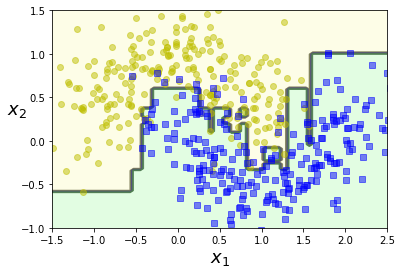

In [ ]:
plot_decision_boundary(ada_clf, X,y)